###<b> Durgesh Vishwakarma </b>  <br/>
MSc IT Sem4 2021-22 | <b> Deep Learning </b> Practical 10 ( <b> PSIT4P3a </b> )  <br/>
VPM’s B. N. Bandodkar College of Science, Thane.  <br/>
<b> PRN: </b> 2015430016

##Aim: Denoising of images using autoencoders.


#1. Importing libraries and dataset
First, we'll import all required libraries and MNIST image dataset.

In [ ]:
#Importing libraries
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#2. Adding Noise to MNIST Image dataset
We will add some noise to encode our original image into a noisy image dataset, which we'll send later as input to Autoencoders to decode or denoising it.

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Below is some sample of Original vs Noisy dataset for review


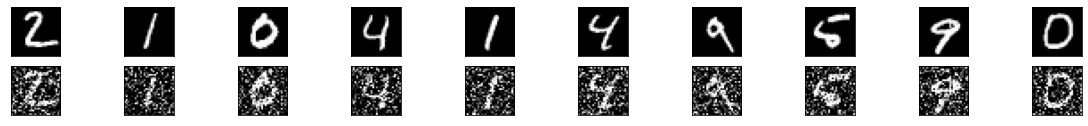

In [ ]:
print("Below is some sample of Original vs Noisy dataset for review")
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    #Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Display Encoded
    ax = plt.subplot(2, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#3. Building Autoencoder model using Keras
Here we will build Autoencoder model using Keras and train it with 100 epochs for better output. It may take few minutes to execute and produce output.

In [ ]:
input_img = Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 7s 8ms/step - loss: 0.2495 - val_loss: 0.1147
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1133 - val_loss: 0.1064
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1069 - val_loss: 0.1035
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1040 - val_loss: 0.1015
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1024 - val_loss: 0.1008
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1012 - val_loss: 0.0993
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1000 - val_loss: 0.0986
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0994 - val_loss: 0.0978
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0986 - val_loss: 0.0975
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0979 - val_lo

#4. Testing Autoencoder model
As our Autoencoder model is ready now. We will compare below to test the model.
1. Original Image
2. Noisy Image
3. Denoise Image

1. Original Image vs 2. Noisy Image vs 3. Denoise Image (Reconstructed Image from Noisy)


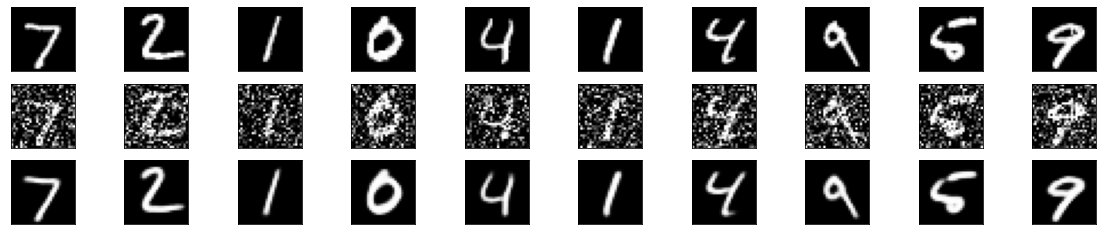

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

print("1. Original Image vs 2. Noisy Image vs 3. Denoise Image (Reconstructed from Noisy Image)")

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Display Encoded
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()